## Solubility of CO2 in Glycerol

Recorded CO2 solubility in glycerol at various pressures at room temperature. While we cannot assume that the relationship is linear at the pressures considered (Henry's Law will begin to fail), we can use these data to interpolate reasonable estimates for the solubility at pressures within the range that the data cover.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# User parameters
# molecular weight of CO2 [g/mol]
mWCO2 = 44
# density of glycerol [g/mL]
rhoGlyc = 1.26
# universal gas constant [J/mol.K]
R = 8.314
# (room) temperature [K]
T = 300
# volume of Parr reactor [mL]
vReactor = 233
# rate of sublimation of dry ice in room temperature air [g/s]
sublimationRate = 0.004
# conversions
bar2Pa = 1E5
mL2M3 = 1E-6

### Data

In [46]:
# Data (from pp. 11, 14, 18&19, and 20)
# mass of dry ice [grams]
mDryIce = np.array([5.28, 11.1, 11.55, 14.4])
# uncertainty
sigmaM = np.array([0.1, 0.1, 0.1, 0.1])
# time of sublimation [s]
tSublimation = np.array([40, 45, 50, 83])
# uncertainty [s]
sigmaT = np.array([5, 5, 5, 5])
# volume of glycerol [mL]
vGlyc = np.array([30, 29.6, 28, 29.5])
# uncertainty
sigmaV = np.array([0.5, 0.5, 0.5, 0.14])
# final Span gauge pressure
pGauge = np.array([7.5, 16.5, 18.5, 20.5])
# uncertainty
sigmaP = np.array([0.5, 0.5, 0.5, 0.5])

### Functions

In [47]:
def convert_pressure(pGauge, sigma=None, pAtm=1.013):
    """
    Converts pressure read by Span pressure gauge on Parr reactor to
    absolute pressure. Calculates the uncertainty in the reading if 
    an uncertainty in the given pressure is provided (sigmaP).
    
    Arguments
        -pGauge: pressure read off by gauge
        -sigmaP: uncertainty in pressure read off by gauge (optional)
        -pAtm: atmospheric pressure (1.013 bar by default). Change if using
            different units than bar
    
    Returns:
        1) Absolute pressure in the same units as pGauge
        *2) Uncertainty in absolute pressure in the same units as sigmaP 
        *(if uncertainty in pressure sigmaP is given) 
    """
    # conversion from measured pressure to actual pressure
    conversion = 1.43
    # uncertainty in conversion
    sigmaC = 0.17
    # absolute pressure
    p = conversion*pGauge + pAtm
    # result
    result = [p]
    # calculate uncertainty
    if sigma:
        sigmaP = np.sqrt((pGauge*sigmaC)**2 + (conversion*sigma)**2)
        result += [sigmaP]
    
    return result

We process the data below.

In [48]:
# adjust mass of dry ice to account for sublimation [g]
mLost = sublimationRate * tSublimation
mDryIce -= mLost
# moles of CO2 in reactor [mol]
nCO2 = mDryIce / mWCO2
# pressure [bar]
p, sigmaP = convert_pressure(pGauge, sigma=0.5)
# convert pressure
p *= bar2Pa
sigmaP *= bar2Pa
# volume of head space occupied by gas [mL]
vGas = vReactor - vGlyc
# convert mL -> m^3
vGasM3 = mL2M3 * vGas
# moles of CO2 in gas phase (assumes ideal gas) [mol]
nCO2Gas = (p*vGasM3) / (R*T)
# moles of CO2 in solution [mol]
nCO2Soln = nCO2 - nCO2Gas
# mass of CO2 in solution [g]
mCO2Soln = mWCO2 * nCO2Soln
# mass of glycerol [g]
mGlyc = rhoGlyc * vGlyc
# solubility [w/w]
solubility = mCO2Soln / mGlyc

print(p/bar2Pa)
print(solubility)

[11.738 24.608 27.468 30.328]
[0.02424591 0.05604474 0.04015022 0.08556536]


### Interpolation and Plotting

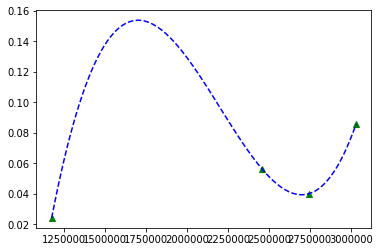

In [49]:
# interpolation function
f = interp1d(p, solubility, kind='cubic')
plt.plot(p, solubility, 'g^', label='data')
pLin = np.linspace(np.min(p), np.max(p), 100)
plt.plot(pLin, f(pLin), 'b--', label='interpolation')

### Conclusion

Because we cannot assume that solubility is linear, we cannot meaningfully estimate the solubility without highly accurate data. As seen by the non-monotonicity of the calculated solubility with respect to pressure, these data are not accurate. **Therefore, the results are not sufficient to estimate the solubility of CO2 in glycerol.**